# Example of visualising the agent's training history performance

`WEIGHTS` : Path to the pre-trained weights
`METRICS` : Path to the training history, or None

In [1]:
WEIGHTS = './output/weights-15000.pth'
METRICS = './output/metrics.csv'

In [2]:
import sys
import torch
import gymnasium as gym
import matplotlib.pyplot as plt

sys.path.append("../")
from DQN import VisionDeepQ                                                                 # noqa

sys.path.append("../../")
from help.visualisation.plot import graph                                                   # noqa
from help.visualisation.gif import gif                                                      # noqa

## Parameters

In [3]:
network = {
    "input_channels": 2, "outputs": 5,
    "channels": [128, 64],
    "kernels": [2, 2],
    "padding": ["valid", "valid"],
    "strides": [2, 1],
    "nodes": [128],
}
optimizer = {"optimizer": torch.optim.RMSprop, "lr": 0.0025}
skip = 5

## Setup

In [4]:
value_agent = VisionDeepQ(
    network=network, optimizer=optimizer,
    exploration_rate=0.001,
)

weights = torch.load(WEIGHTS, map_location=torch.device('cpu'))
value_agent.load_state_dict(weights)

environment = gym.make('ALE/Tetris-v5', render_mode="rgb_array",
                       obs_type="grayscale", frameskip=1, repeat_action_probability=0.0)
environment.metadata["render_fps"] = 30

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


## Visualise

### Plotting the metrics from the csv-file created during training.

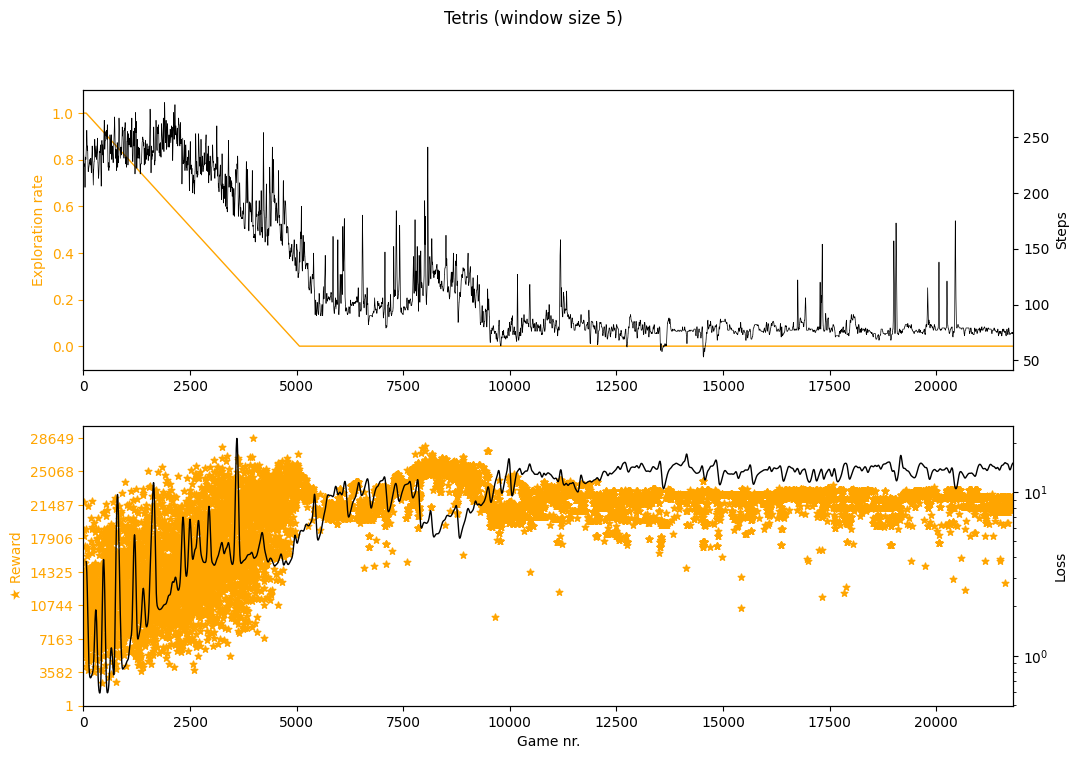

In [5]:
graph(METRICS, title="Tetris", window=5) if METRICS else None
plt.savefig('./metrics.png') if METRICS else None
plt.show() if METRICS else None

### Creating and saving a gif of the agent in action. The gif will be saved to the given path.

In [6]:
gif(environment, value_agent, '../tetris.gif', skip, 40)